# **Chapter 3 Introduction to Keras and TensorFlow**

<br>

## Chapter covers
### **A closer look at TensorFlow, Keras, and their relationship**
### **Setting up a deep learning workspace**
### **An overview of how core deep learning concepts translate to Keras and TensorFlow**

## What's TensorFlow?

- TensorFlow is a Python-based, free, open source machine learning platform, developed primarily by Google. Much like NumPy, the primary purpose of TensorFlow is to enable engineers and researchers to manipulate mathematical expressions over numerical tensors<br><br>


---


**텐서플로우의 장점(NumPy와 비교)**
- It can automatically compute the gradient of any differentiable expression (as
you saw in chapter 2), making it highly suitable for machine learning.
- It can run not only on CPUs, but also on GPUs and TPUs, highly parallel hardware accelerators.
- Computation defined in TensorFlow can be easily distributed across many
machines.
- TensorFlow programs can be exported to other runtimes, such as C++, JavaScript (for browser-based applications), or TensorFlow Lite (for applications running on mobile devices or embedded devices), etc. This makes TensorFlow applications easy to deploy in practical settings.


---

- Tensorflow는 다수의 라이브러리를 종합한 딥러닝 플랫폼:TF Agent, TFX, TF Serving 등

# What's Keras?
- **Keras is deep learning API for Python**, built on top of TensorFlow, that provides a conivenient way to define and train any kind of deep learning model.


---

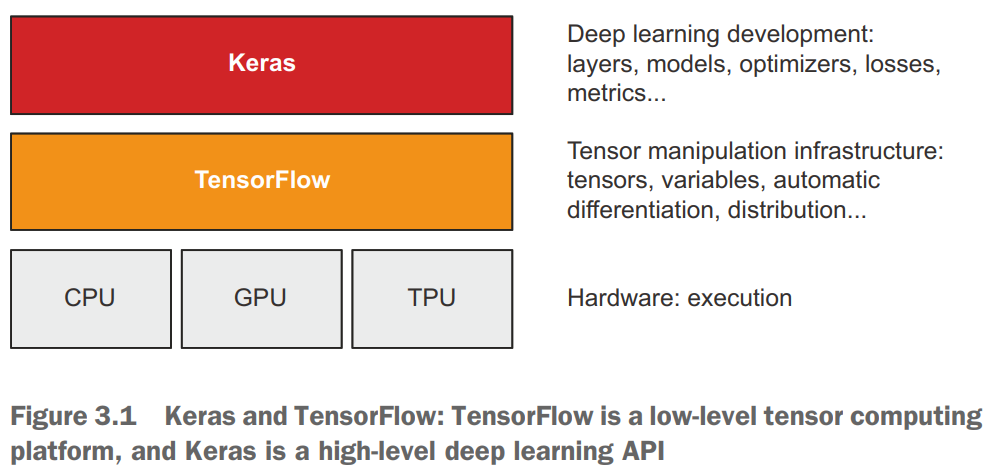

# **Keras and TensorFlow: A brief history**

## Setting up a deep-learning workspace(딥러닝 작업환경 구축)

- CPU만을 사용하는 딥러닝 학습은 너무 느리기 때문에 GPU나 TPU가 필수적
- GPU를 사용한 딥러닝 작업에는 3가지 방법이 있음<br>
1) 컴퓨터를 위해 NVIDIA GPU를 구매<br>
2) 구글 클라우드나 아마존 AWS EC2의 GPU 인스턴스 사용<br>
3) 구글 콜랩의 무료 GPU 런타임 사용: 제일 간단한 방법<br><br>

- 클라우드 인스턴스를 사용하는 것은 소규모 일때는 비용이 적게 들지만 규모가 커지면 비용 대비 효과적이지 않음
-  딥러닝을 매우 많이 사용한다면 전용 하드웨어를 구축하는 것이 비용 효과적일 수 있음: 전력관리, 항온유지에 비용과 노력이 많이들고  하드웨어/소프트웨어 장애시 손실이 있는 것을 감안해야 함. 규모가 커지면 추가적으로 관리할 인력도 필요함 

### Jupyter notebooks: The preferred way to run deep-learning experiments
### 주피터 노트북은 간단한 데이터 처리나 딥러닝 모델의 본격적인 학습 이전에 테스트 용도로 좋음

## **3.5 First steps with TensorFlow**

## Training a neural network revolves around the following concepts:<br><br>

### training a neural network revolves around the following concepts:


### 1. **First, low-level tensor manipulation—the infrastructure that underlies all modern machine learning. This translates to TensorFlow APIs**:


*   Tensors, including special tensors that store the network’s state (variables)
*   Tensor operations such as addition, relu, matmul
*   Backpropagation, a way to compute the gradient of mathematical expressions
(handled in TensorFlow via the GradientTape object)


### 2. **Second, high-level deep learning concepts. This translates to Keras APIs:**

*   Layers, which are combined into a model
*   A loss function, which defines the feedback signal used for learning
*   An optimizer, which determines how learning proceeds
*   Metrics to evaluate model performance, such as accuracy
*   A training loop that performs mini-batch stochastic gradient descent



#### **3.5.1 Constant tensors and variables**

**All-ones or all-zeros tensors**

In [ ]:
import tensorflow as tf
import numpy as np
x = tf.ones(shape=(2, 1)) # p.ones(shape=(2, 1)) 와 동등한 결과
print(x)

In [ ]:
x = tf.zeros(shape=(2, 1))
print(x)

**Random tensors**

In [ ]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.) # normal distribution(정규분포)으로 텐서 값 가져오기
print(x)

In [ ]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.) # random distribution(균등분포)으로 텐서 값 가져오기
print(x)

**NumPy arrays are assignable**

In [ ]:
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
x

In [ ]:
# 즉시 실행(eager) 모드에서는 연산 결과만으로 특정 텐서가 값을 변경할 수 없는 상수인지 확인이 불가능함
#
x = tf.ones(shape=(2,2))
x[0, 0] = 0
x

### **Assigning a value to a TensorFlow variable**<br>
- To train a model, we’ll need to update its state, which is a set of tensors. If tensors aren’t assignable, 
- how do we do it? That’s where variables come in. **tf.Variable** is the class  meant to manage modifiable state in TensorFlow.
- To create a variable, you need to provide some initial value, such as a random tensor.


**Creating a TensorFlow variable**

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

In [ ]:
v.assign(tf.ones((3, 1)))

**Assigning a value to a subset of a TensorFlow variable**

In [ ]:
v[0, 0].assign(3.)

**Using `assign_add`**

In [ ]:
v.assign_add(tf.ones((3, 1)))

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

## A second look at the GradientTape API<br>


*   자동미분(automatic differentiation)은 신경망 학습을 위한 역전파(backpropagation)와 같은 머신러닝 알고리즘 구현에 중요한 역할을 함
*   자동 미분을 위해서 텐서플로우는 정방향 패스(pass) 동안 어떤 연산이 수행되었는지의 순서를 기억하고 이 연산 목록을 역순으로 이동하여 그래디언트(gradient)를 계산함
*   tf.GradientTape는 컨텍스트(context) 안에서 실행된 모든 연산을 테이프(tape)에 "기록"합니다. 그 다음 텐서플로는 후진 방식 자동 미분(reverse mode differentiation)을 사용해 테이프에 "기록된" 연산의 그래디언트를 계산




**Using the `GradientTape`**

In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [ ]:
gradient

**Using `GradientTape` with constant tensor inputs**

In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

# **3.5.4 An end-to-end example: A linear classifier in pure TensorFlow**

**Generating two classes of random points in a 2D plane**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

## **Plotting the two point classes**<br>
- A linear classifier is an affine transformation **(prediction = W • input + b)** trained to minimize the square of the difference between predictions and the targets

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables** :  Let’s create our variables, W and b, initialized with random values and with zeros

In [ ]:
input_dim = 2
output_dim = 1 # 예측값이 0에 가까우면 0, 1에 가까우면 1이 됨 
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [ ]:
for step in range(10):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

## Our model's predictions on the training inputs

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

In [ ]:
predictions[:, 0] > 0.5

In [ ]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1] # 두 집단을 구분하는 경계선 공식
plt.plot(x, y, "r-")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## 3.6 Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

#### Automatic shape inference: Building layers on the fly

In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
# 32, 64, 32  뉴런을 가진 simple dense layer 만들기
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

## **3.6.2 From layers to models**
- Two-branch networks: 두 종류의 네트웍을 연결하여 학습
- Multihead networks: classification layer가 다수 존재
- Residual connections: 잔차를 연결함
<br>

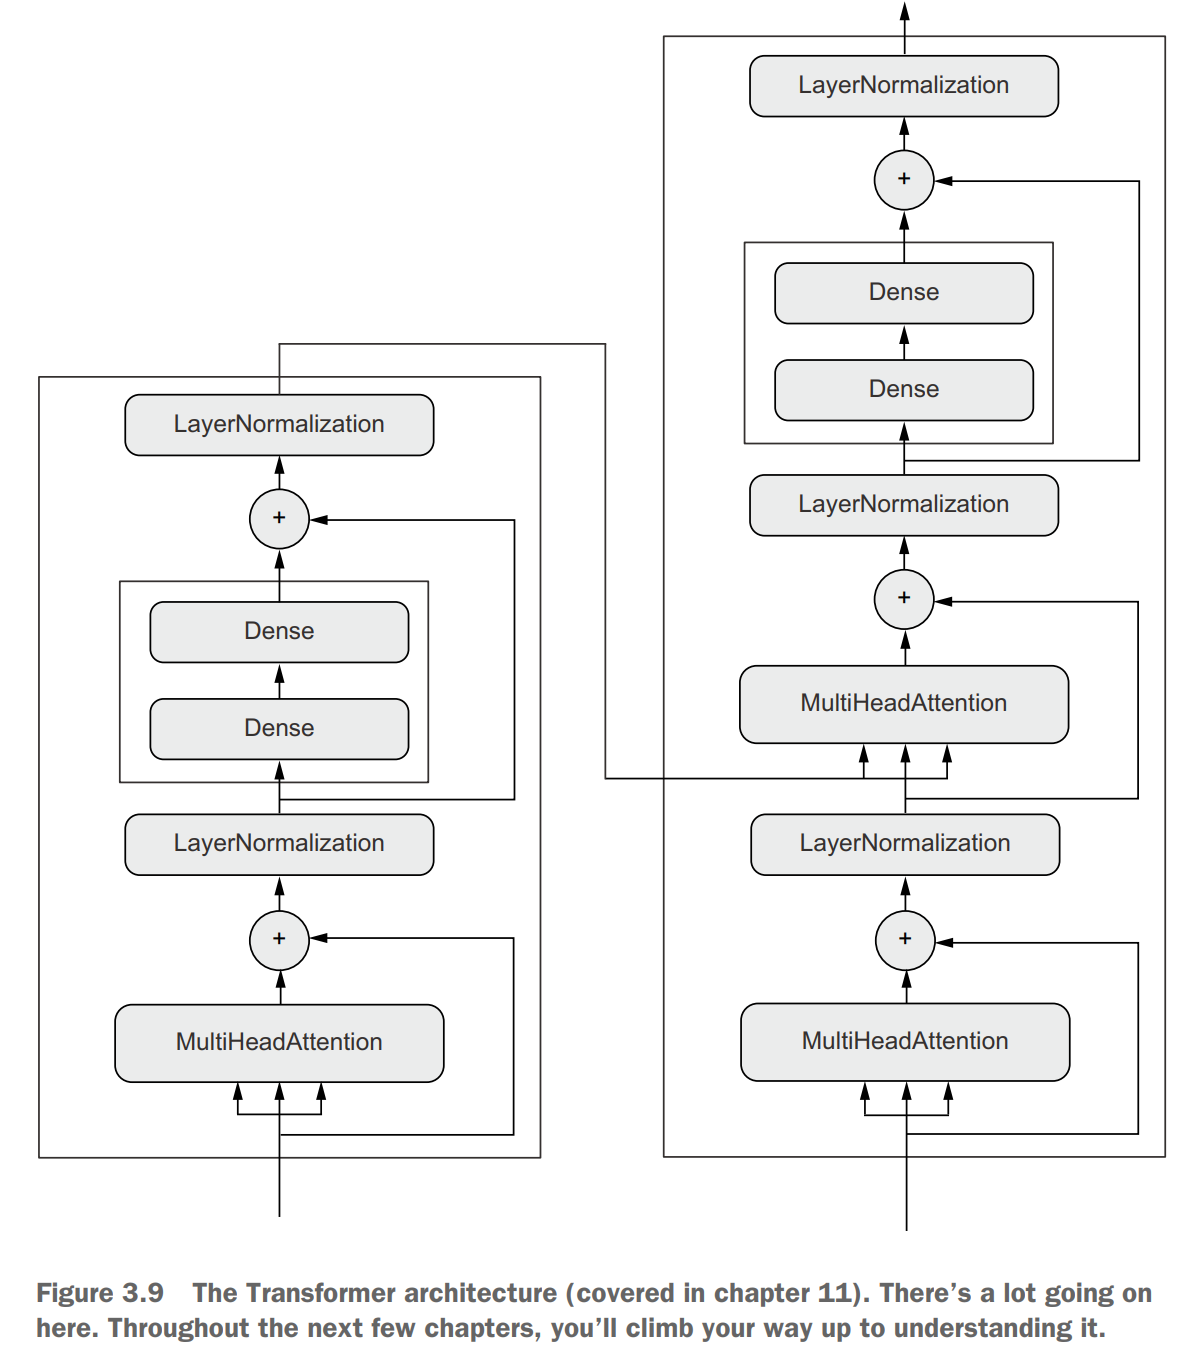

### The "compile" step: Configuring the learning process

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

## 모델 분류 성능평가 지표(Metrics)<br>

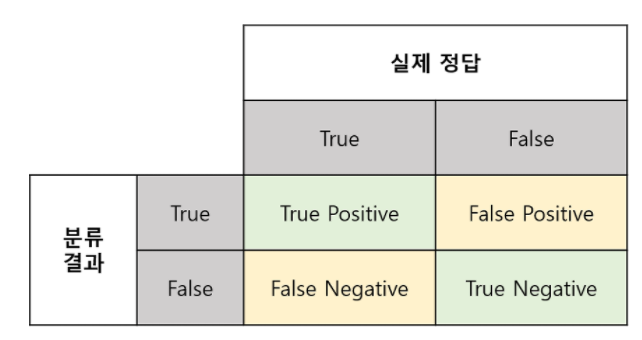


1.   Accuracy(정확도): (TP + TN)/(TP + TN + FP + FN)
2.   Precision(정밀도): 모델이 True로 분류한 것 중에서 실제 True의 비율 (TP/(TP + FP)
3.   Recall(재현율): 실제 True 값 중에서 모델이 True로 예측한 비율. Sensitivity나 hit rate으로 불리기도 함. (TP/(TP + FN))

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

In [ ]:
history.history

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

### Inference: Using a model after training

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])